# Problem Statement

## Cross-Sell Prediction
Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### Understand the data
### Variable	Definition
- **id**: Unique ID for the customer
- **Gender**:	Gender of the customer
- **Age**: Age of the customer
- **Driving_License**: 0 : Customer does not have DL, 1 : Customer already has DL
- **Region_Code**: Unique code for the region of the customer
- **Previously_Insured**:	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- **Vehicle_Age**:	Age of the Vehicle 
- **Vehicle_Damage**:
-- **1** : Customer got his/her vehicle damaged in the past.
-- **0** : Customer didn't get his/her vehicle damaged in the past.
- **Annual_Premium**:	The amount customer needs to pay as premium in the year
- **Policy_Sales_Channel**:Policy_Sales_Channel	Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- **Vintage**:	Number of Days, Customer has been associated with the company

### target
- **Response**:	1 :  Customer is interested, 0 : Customer is not interested

# Data understanding and observations
#### Import Libraries

In [135]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

#### Read the data

In [136]:
# read the data
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

#### Descriptive Analysis

In [137]:
# total no.of rose and columns
train.shape, test.shape

((381109, 12), (127037, 11))

In [138]:
#get the datatypes
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [139]:
# get all details of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [140]:
# to see first few rows 
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [141]:
# check the missing data elements
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [142]:
# There are no missing elements in the given dataset

In [143]:
# to check duplicates
train.duplicated().sum()

0

In [144]:
# There is no duplicate values in the given dataset

In [145]:
#check the details of test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [146]:
# check target data
train.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [147]:
train['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [148]:
# target in percentage distribution 
train.Response.value_counts(normalize=True)*100

Response
0    87.743664
1    12.256336
Name: proportion, dtype: float64

#### Observations 
- The dataset contains 381,109 records with 12 columns.
- Response is the target variable (1 = Interested, 0 = Not Interested).
- Categorical variables: Gender, Vehicle_Age, Vehicle_Damage.
- Continuous numerical variables: Age, Annual_Premium, Vintage, Region_Code, etc.
- No missing values detected.

<Axes: xlabel='Response'>

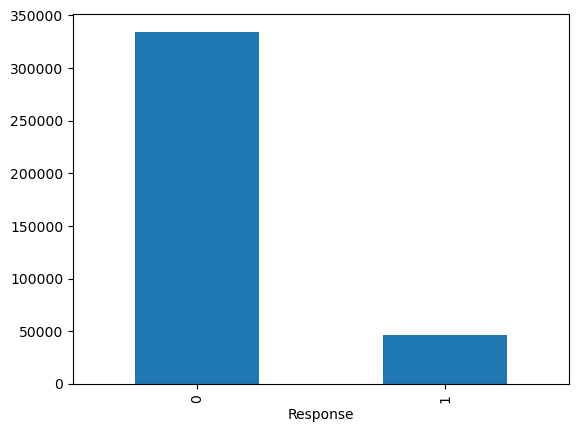

In [149]:
train.Response.value_counts().plot(kind='bar')

- target is imbalanced dataset   

In [150]:
tgt_col = ['Response']
ign_cols = ['id']

In [151]:
# statistical info

train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [152]:
train.drop(columns=ign_cols).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [153]:
train.describe(include='object').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [154]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [155]:
# check unique values

for col in train.drop(columns=ign_cols).columns:
    print(col,train[col].nunique(),  '=>', train[col].unique())

Gender 2 => ['Male' 'Female']
Age 66 => [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License 2 => [1 0]
Region_Code 53 => [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Previously_Insured 2 => [0 1]
Vehicle_Age 3 => ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage 2 => ['Yes' 'No']
Annual_Premium 48838 => [ 40454.  33536.  38294. ...  20706. 101664.  69845.]
Policy_Sales_Channel 155 => [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  

<Axes: xlabel='Annual_Premium', ylabel='Density'>

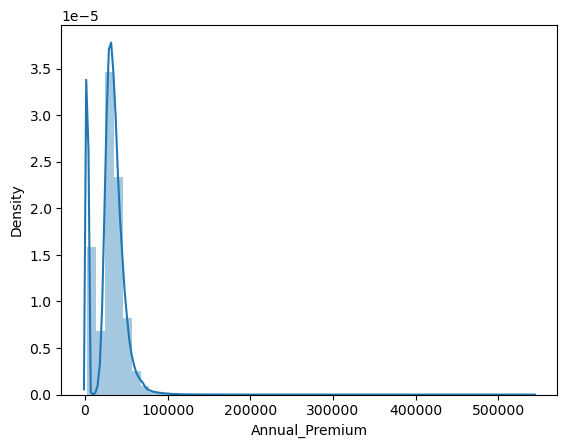

In [156]:
sns.distplot(train.Annual_Premium)

- most of customers paying around 50k annual premium
- those who have annual premium 100k are very low

<Axes: xlabel='Policy_Sales_Channel', ylabel='Density'>

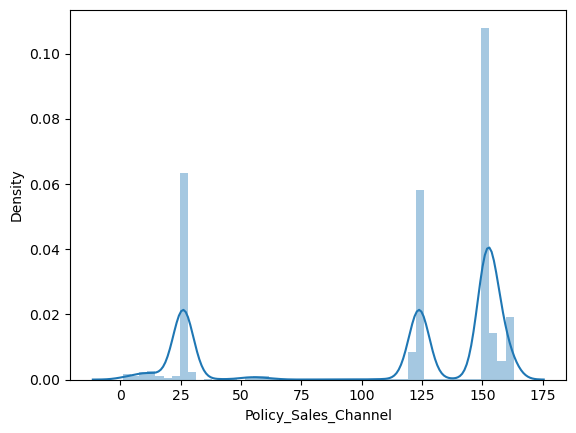

In [157]:
sns.distplot(train.Policy_Sales_Channel)       

- most of customers through the ploicy sales channel of 150 code

<Axes: xlabel='Vintage', ylabel='Density'>

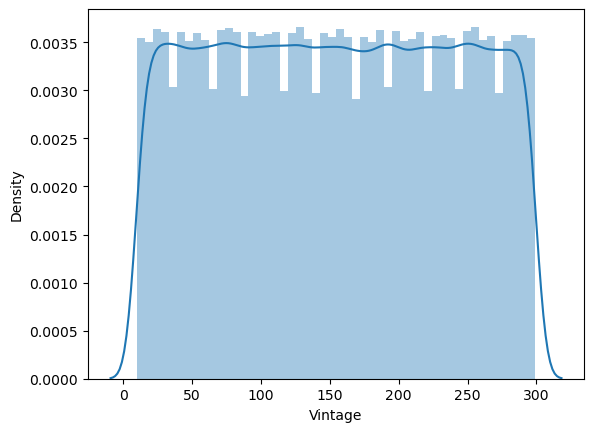

In [158]:
sns.distplot(train.Vintage)       

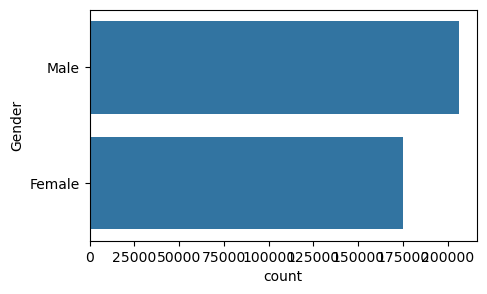

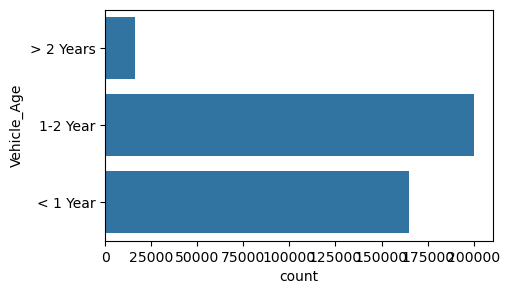

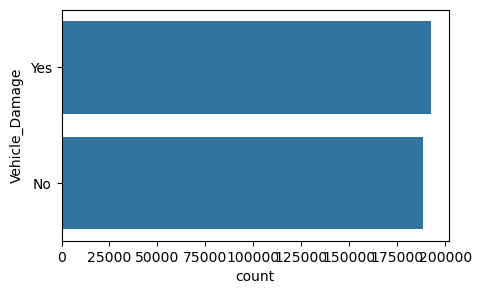

In [159]:
for col in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(5,3))
    sns.countplot(y=train[col])
    plt.show()

- vehicle damage condition is balanced dataset
- Age of vehicle is < 2 years
- Gender is a balanced dataset

<Axes: ylabel='Vintage,Response'>

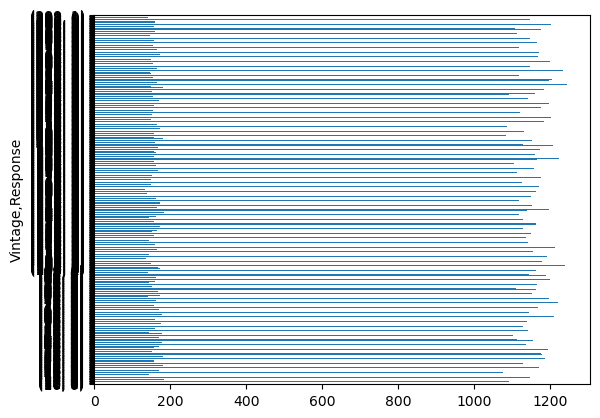

In [160]:
train[['Vintage','Response']].groupby('Vintage').value_counts().plot(kind='barh')

In [161]:
exp_tgt = train[['Vintage','Response']].groupby('Vintage').value_counts().unstack()
exp_tgt['%'] = exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)

Response,0,1,%
Vintage,,,
220,1083,186,14.657210
212,1086,182,14.353312
223,1122,186,14.220183
11,1153,191,14.211310
84,1162,192,14.180207
...,...,...,...
103,1240,143,10.339841
245,1244,143,10.310022
162,1165,133,10.246533


- Customers who has been associated with the company more than 200 days seeking for the insurance after expiry

### Preprocessing

##### Steps

* Address missing data - No missing values found in the given dataset
* Encoding on category columns
* Standardize numerical columns
* Treat data imbalance 

In [162]:
# import libraries for pre-processing 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score

In [163]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [164]:
# separate category and numeric features
cat_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

num_cols = ['Age','Annual_Premium','Region_Code','Driving_License','Previously_Insured','Policy_Sales_Channel','Vintage']

In [165]:
print(tgt_col, ign_cols, cat_cols, num_cols, sep='\n')

['Response']
['id']
['Gender', 'Vehicle_Age', 'Vehicle_Damage']
['Age', 'Annual_Premium', 'Region_Code', 'Driving_License', 'Previously_Insured', 'Policy_Sales_Channel', 'Vintage']


In [166]:
# Encode categorical variables
label_encoders = {}

for col in ['Gender', 'Vehicle_Age', 'Vehicle_Damage']:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le  # Store encoder for test data transformation

In [167]:

# Normalize numerical features
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])

In [168]:
# Split dataset into train and validation sets
X = train.drop(columns=['id', 'Response'])  # Exclude ID and target column
y = train['Response']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((304887, 10), (76222, 10), (304887,), (76222,))

### LogisticRegression

In [169]:

# Train a Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_val)
y_pred_proba = log_model.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

accuracy, roc_auc

(0.8750623179659416, 0.824404822644531)

In [170]:
# Tuning Logistic Regression Model

# set the hyper parameters
params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }    
]

# map the grid parameters with pipeline

grid = GridSearchCV(estimator=model_pipeline, param_grid=params, 
                    cv=2, scoring='roc_auc')

In [171]:
# fit the grid model

grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('sca...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=6,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=200,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [172]:
# get the best parameter

grid.best_params_

{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}

In [173]:
# show the grid results

res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.836347,4
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.836348,1
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.836348,3
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.836348,1


### RandomForestClassifier

In [174]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_val)
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

accuracy, roc_auc

(0.8644617039699825, 0.8371726195521203)

### XGBoost

In [175]:
import xgboost as xgb

# Define and train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, eval_metric="auc", subsample=1.0, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_val)
y_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_val, y_pred_proba_xgb)

accuracy_xgb, roc_auc_xgb

(0.8751279158248275, 0.86095434043167)

##### Tried GridSerach with varied parameters; unfortunately system couldn't take this load and restarted multiple times. 

In [176]:
# Define parameter grid for XGBoost tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9]    
}

# Tried GridSerach with varied parameters; unfortunately system couldn't take this load and restarted multiple times. 
# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid, 
    scoring='roc_auc', 
    cv=3, 
    verbose=1, 
    n_jobs=-1
)

# Run GridSearchCV to find the best parameters
#grid_search.fit(X_train, y_train)

# Get the best parameters and best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

#best_params, best_score ##


- ***Observations & Model Performance***
- XGBoost yields the better performance compared with RandomForrestClassifier and Logistic Regression

#### Pipelining with XGBoost Model

In [177]:
# categorical preperation

cat_pipe_encode = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # categetoy encoding
])

In [178]:
# numerical features preperation

num_pipe_encode = Pipeline(
steps = [
    ('impute_num', SimpleImputer(strategy='median')), # missing values
    ('scale',StandardScaler()) # standard scaler
])


In [179]:
# map tranformation to features

preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ]
)

In [180]:
# integrate preprocessing and model

model_pipeline = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, eval_metric="auc", subsample=1.0, random_state=42))
])

In [181]:
X = train.drop(columns=ign_cols+tgt_col)
X.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,0.333777,0.046208,0.121784,-0.919638,2,1,0.574539,-1.587234,0.748795
1,1,2.396751,0.046208,-1.767879,-0.919638,0,0,0.172636,-1.587234,0.342443


In [182]:
y = train[tgt_col]
y.head(2)

,Response
0,1
1,0


#### train test split

In [183]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [184]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.1)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((342998, 10), (38111, 10), (342998, 1), (38111, 1))

In [185]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Ag...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [186]:
# fit the model

model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Ag...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [187]:
# predict target with probability

model_pipeline.predict_proba(val_X)

array([[9.9954605e-01, 4.5392980e-04],
       [7.3796791e-01, 2.6203209e-01],
       [6.7386585e-01, 3.2613415e-01],
       ...,
       [8.8669616e-01, 1.1330386e-01],
       [9.2589796e-01, 7.4102066e-02],
       [7.0963418e-01, 2.9036579e-01]], dtype=float32)

In [188]:
model_pipeline.predict_proba(val_X)[:,0]

array([0.99954605, 0.7379679 , 0.67386585, ..., 0.88669616, 0.92589796,
       0.7096342 ], dtype=float32)

In [189]:
model_pipeline.predict_proba(val_X)[:,1]

array([0.00045393, 0.2620321 , 0.32613415, ..., 0.11330386, 0.07410207,
       0.2903658 ], dtype=float32)

In [190]:
# predict target 

model_pipeline.predict(val_X)

array([0, 0, 0, ..., 0, 0, 0])

In [191]:
# evaluation method

def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    # plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()
#model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)   

Train AUC
0.5022904358518108
Valid AUC
0.5013134926175268
Train cnf_matrix
[[301014     57]
 [ 41727    200]]
Valid cnf_matrix
[[33318    10]
 [ 4769    14]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    301071
           1       0.78      0.00      0.01     41927

    accuracy                           0.88    342998
   macro avg       0.83      0.50      0.47    342998
weighted avg       0.87      0.88      0.82    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     33328
           1       0.58      0.00      0.01      4783

    accuracy                           0.87     38111
   macro avg       0.73      0.50      0.47     38111
weighted avg       0.84      0.87      0.82     38111



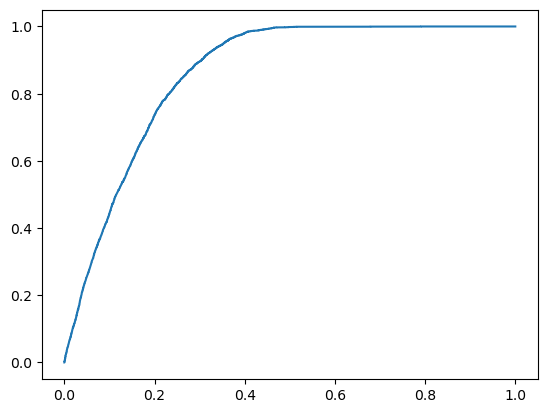

In [192]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

##### Predicting for the test data

In [193]:
# read the submission file
#predict with the last model
#and upload into the hack website

sub = pd.read_csv('sample_submission_iA3afxn.csv')
sub.head(3)

,id,Response
0,381110,0
1,381111,0
2,381112,0


In [194]:
 test.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199


In [195]:
train.columns.difference(test.columns)

Index(['Response'], dtype='object')

In [196]:
# updating the existing target values with predicted values
sub['Response'] = model_pipeline.predict(test)

In [197]:
sub.to_csv('sub_1.csv',index=False)

In [198]:
sub

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


* result uploaded in the analytics vidhya website and the recieved score

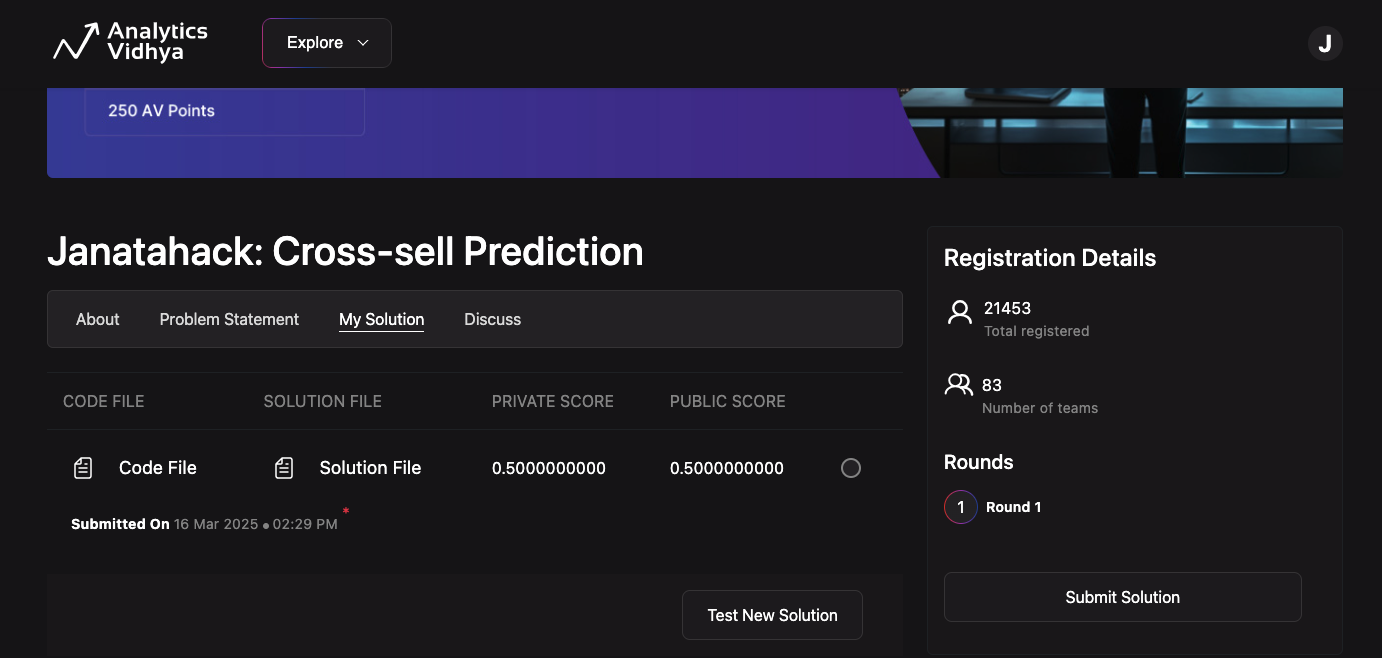

### perform oversampling to balance the dataset

In [209]:
from imblearn.over_sampling import RandomOverSampler

In [210]:
over_sampling = RandomOverSampler()

In [211]:
import imblearn
imblearn.__version__

'0.12.4'

In [213]:
import sklearn
sklearn.__version__

'1.5.2'

In [215]:
train_y.value_counts()

Response
0           301071
1            41927
Name: count, dtype: int64

In [238]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [239]:
train_y_os.value_counts()

Response
0           301071
1           301071
Name: count, dtype: int64

In [240]:
from sklearn.tree import DecisionTreeClassifier

#### Using GridSearch to hyper tune multi model

In [241]:
params_2 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    }
]

In [242]:
params_2

[{'model': [LogisticRegression()],
  'model__penalty': ['l2', None],
  'model__C': [0.5, 3]},
 {'model': [DecisionTreeClassifier()], 'model__max_depth': [3, 5]}]

In [243]:
grid_2 = GridSearchCV(estimator=model_pipeline, param_grid=params_2, 
                    cv=2, scoring='roc_auc')

In [244]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('sca...
                                                      max_depth=6,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=200,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [245]:
grid_2.best_params_

{'model': DecisionTreeClassifier(), 'model__max_depth': 5}

In [246]:
grid_2.cv_results_

{'mean_fit_time': array([1.0364095 , 0.94662428, 0.96224093, 0.9730711 , 0.99929893,
        1.28212595]),
 'std_fit_time': array([0.00423253, 0.01041198, 0.01797986, 0.00195789, 0.00038111,
        0.01361799]),
 'mean_score_time': array([0.27554595, 0.27825582, 0.31086743, 0.2549901 , 0.24745405,
        0.25139904]),
 'std_score_time': array([0.00376999, 0.00675714, 0.04129779, 0.00448704, 0.0056411 ,
        0.00374794]),
 'param_model': masked_array(data=[LogisticRegression(), LogisticRegression(),
                    LogisticRegression(), LogisticRegression(),
                    DecisionTreeClassifier(), DecisionTreeClassifier()],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__C': masked_array(data=[0.5, 0.5, 3.0, 3.0, --, --],
              mask=[False, False, False, False,  True,  True],
        fill_value=1e+20),
 'param_model__penalty': masked_array(data=['l2', None, 'l2', None, --, --],
     

In [247]:
new_model = grid_2.best_estimator_

Train AUC
0.7911719425332089
Valid AUC
0.7955868245212355
Train cnf_matrix
[[201580  99491]
 [  3656  38271]]
Valid cnf_matrix
[[22455 10873]
 [  395  4388]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.67      0.80    301071
           1       0.28      0.91      0.43     41927

    accuracy                           0.70    342998
   macro avg       0.63      0.79      0.61    342998
weighted avg       0.90      0.70      0.75    342998

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     33328
           1       0.29      0.92      0.44      4783

    accuracy                           0.70     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.70      0.75     38111



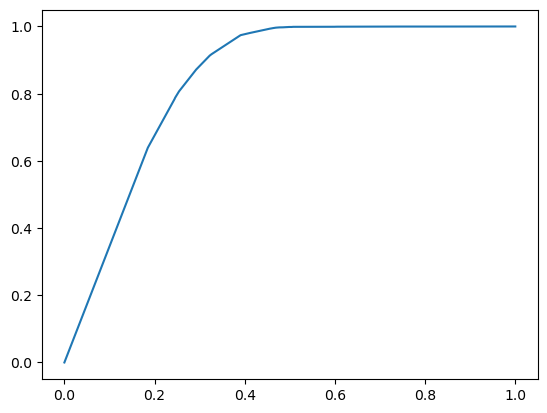

In [248]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

Train AUC
0.7914594896220493
Valid AUC
0.7955868245212355
Train cnf_matrix
[[201580  99491]
 [ 26080 274991]]
Valid cnf_matrix
[[22455 10873]
 [  395  4388]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.89      0.67      0.76    301071
           1       0.73      0.91      0.81    301071

    accuracy                           0.79    602142
   macro avg       0.81      0.79      0.79    602142
weighted avg       0.81      0.79      0.79    602142

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     33328
           1       0.29      0.92      0.44      4783

    accuracy                           0.70     38111
   macro avg       0.64      0.80      0.62     38111
weighted avg       0.90      0.70      0.75     38111



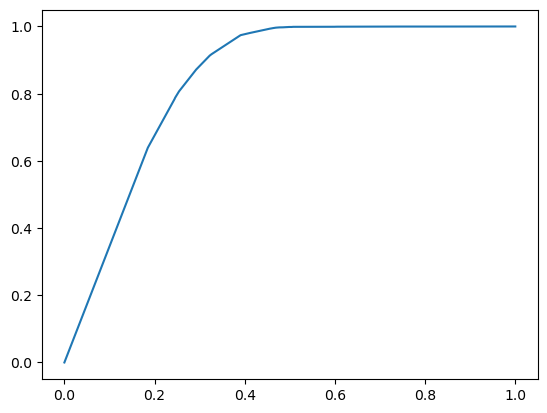

In [249]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,new_model)


In [250]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.836374,2
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.836374,4
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.836374,3
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.836374,4
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.817098,6
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.837878,1


In [232]:
# updating the existing target values with predicted values
sub['Response'] = new_model.predict(test)
sub.to_csv('sub_2.csv',index=False)

* result uploaded in the analytics vidhya website and the recieved score

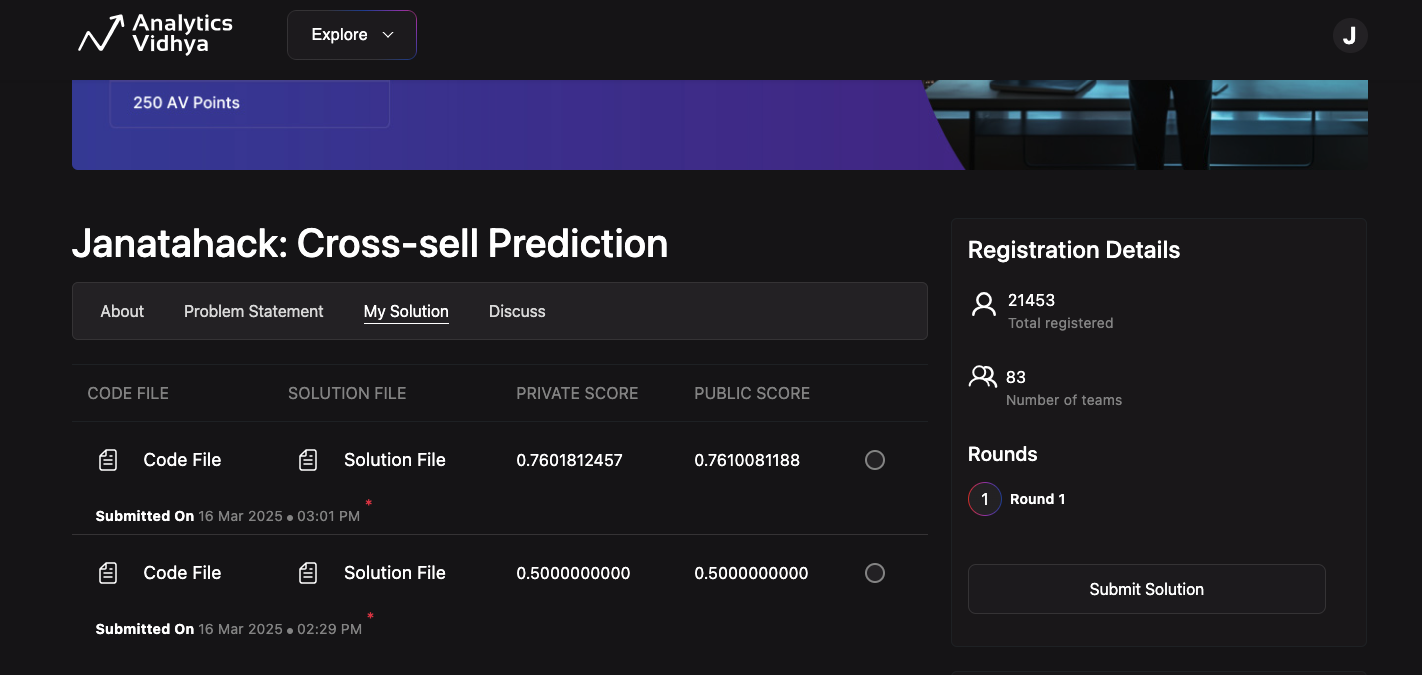

#### Using GridSearch to hyper tune multi model along with ensembling

In [251]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier

In [252]:
params_3 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],],   
        final_estimator=LogisticRegression()

    )],
    'model__sclf1__max_depth':[4,8],
    'model__sclf2__n_estimators':[15,25],    
    'model__sclf3__n_estimators':[5,35],    
    }
]

In [253]:
grid_3 = GridSearchCV(estimator=model_pipeline, param_grid=params_3, 
                    cv=2, scoring='roc_auc')

In [ ]:
grid_3.fit(train_X_os, train_y_os)

### Pickling the model

In [ ]:
import joblib

In [ ]:
joblib.dump(model_pipeline,'insurance_cross_sell_pred_pipeline_model.pkl')